In [1]:
# Importing Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
# Load images B1.tif to B8.tif into a list
images = [cv2.imread(f'bariloche2/B{i}.tif', cv2.IMREAD_UNCHANGED) for i in range(1, 9)]

# Check if all images loaded
for i, img in enumerate(images, start=1):
    if img is None:
        print(f"Image B{i}.tif failed to load.")
    else:
        print(f"Image B{i}.tif loaded successfully with shape: {img.shape}")

Image B1.tif loaded successfully with shape: (873, 1261, 4)
Image B2.tif loaded successfully with shape: (873, 1261, 4)
Image B3.tif loaded successfully with shape: (873, 1261, 4)
Image B4.tif loaded successfully with shape: (873, 1261, 4)
Image B5.tif loaded successfully with shape: (873, 1261, 4)
Image B6.tif loaded successfully with shape: (873, 1261, 4)
Image B7.tif loaded successfully with shape: (873, 1261, 4)
Image B8.tif loaded successfully with shape: (873, 1261, 4)


In [3]:
# Display dimensions, data type, and pixel statistics for each image
for i, img in enumerate(images, start=1):
    print(f"\nImage B{i}.tif:")
    print(f" - Shape: {img.shape}")
    print(f" - Data Type: {img.dtype}")
    print(f" - Min Pixel Value: {np.min(img)}")
    print(f" - Max Pixel Value: {np.max(img)}")
    print(f" - Mean Pixel Value: {np.mean(img):.2f}")
    print(f" - Standard Deviation: {np.std(img):.2f}")


Image B1.tif:
 - Shape: (873, 1261, 4)
 - Data Type: uint8
 - Min Pixel Value: 0
 - Max Pixel Value: 255
 - Mean Pixel Value: 116.25
 - Standard Deviation: 97.71

Image B2.tif:
 - Shape: (873, 1261, 4)
 - Data Type: uint8
 - Min Pixel Value: 0
 - Max Pixel Value: 255
 - Mean Pixel Value: 114.44
 - Standard Deviation: 99.96

Image B3.tif:
 - Shape: (873, 1261, 4)
 - Data Type: uint8
 - Min Pixel Value: 0
 - Max Pixel Value: 255
 - Mean Pixel Value: 119.98
 - Standard Deviation: 99.62

Image B4.tif:
 - Shape: (873, 1261, 4)
 - Data Type: uint8
 - Min Pixel Value: 0
 - Max Pixel Value: 255
 - Mean Pixel Value: 117.56
 - Standard Deviation: 99.89

Image B5.tif:
 - Shape: (873, 1261, 4)
 - Data Type: uint8
 - Min Pixel Value: 0
 - Max Pixel Value: 255
 - Mean Pixel Value: 155.75
 - Standard Deviation: 92.45

Image B6.tif:
 - Shape: (873, 1261, 4)
 - Data Type: uint8
 - Min Pixel Value: 0
 - Max Pixel Value: 255
 - Mean Pixel Value: 149.88
 - Standard Deviation: 95.51

Image B7.tif:
 - Shap

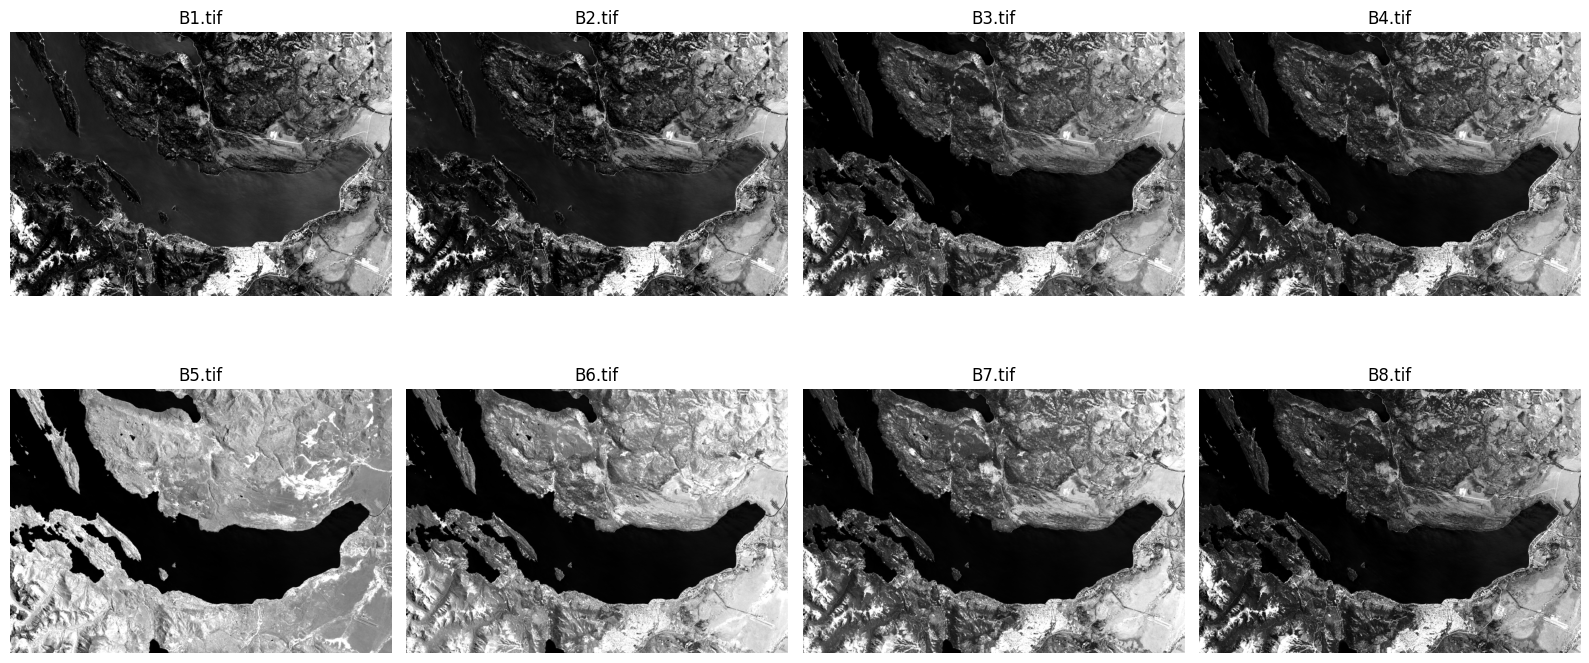

In [4]:
# Display each image in a 2x4 grid for comparison
plt.figure(figsize=(16, 8))
for i, img in enumerate(images, start=1):
    plt.subplot(2, 4, i)
    plt.imshow(img, cmap='gray')
    plt.title(f"B{i}.tif")
    plt.axis('off')
plt.tight_layout()
plt.show()

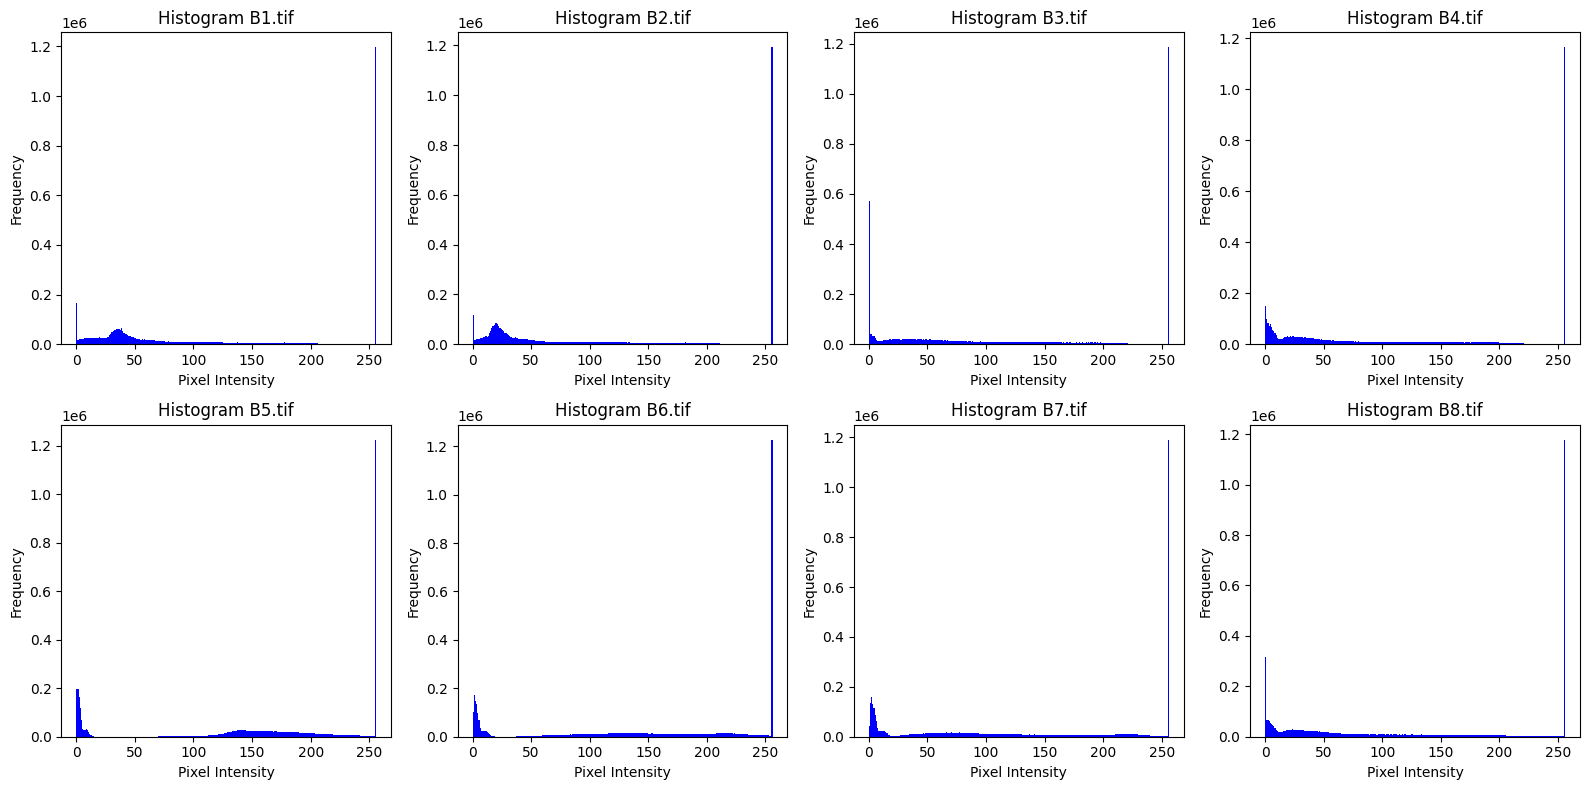

In [5]:
# Plot histograms for pixel intensities in each image
plt.figure(figsize=(16, 8))
for i, img in enumerate(images, start=1):
    plt.subplot(2, 4, i)
    plt.hist(img.ravel(), bins=256, range=[0, 256], color='blue')
    plt.title(f"Histogram B{i}.tif")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

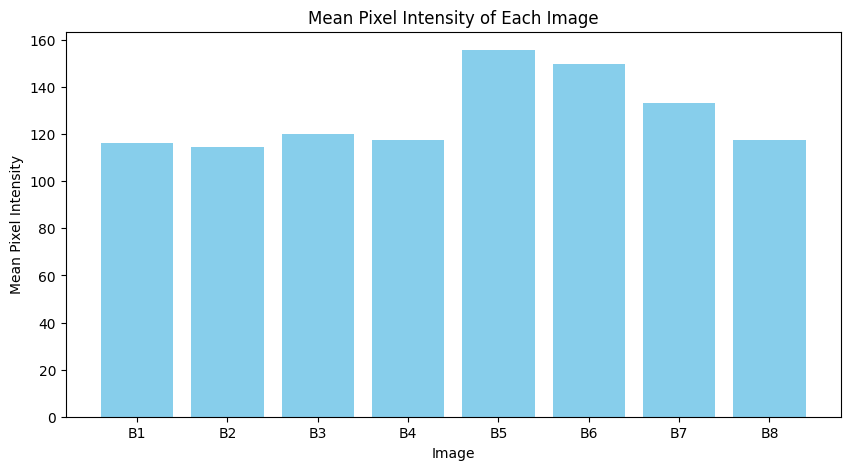

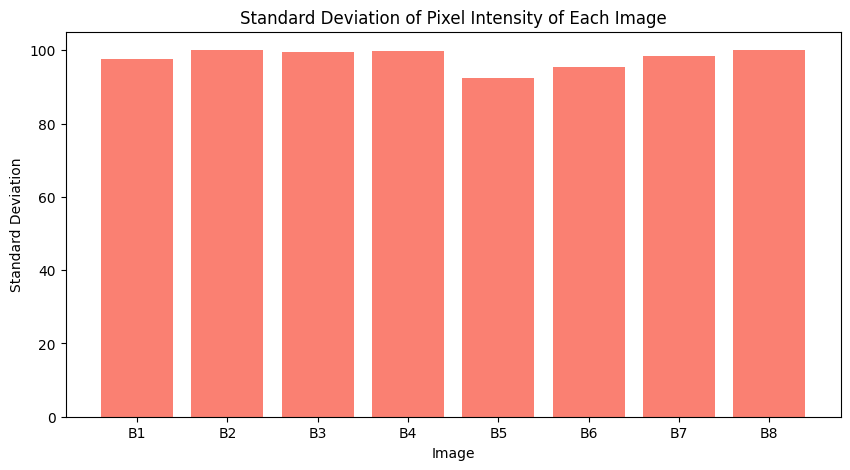

In [6]:
# Compare the mean and standard deviation of pixel values across images
mean_values = [np.mean(img) for img in images]
std_dev_values = [np.std(img) for img in images]

# Plot mean pixel values for each image
plt.figure(figsize=(10, 5))
plt.bar(range(1, 9), mean_values, color='skyblue')
plt.title("Mean Pixel Intensity of Each Image")
plt.xlabel("Image")
plt.ylabel("Mean Pixel Intensity")
plt.xticks(range(1, 9), [f"B{i}" for i in range(1, 9)])
plt.show()

# Plot standard deviation of pixel values for each image
plt.figure(figsize=(10, 5))
plt.bar(range(1, 9), std_dev_values, color='salmon')
plt.title("Standard Deviation of Pixel Intensity of Each Image")
plt.xlabel("Image")
plt.ylabel("Standard Deviation")
plt.xticks(range(1, 9), [f"B{i}" for i in range(1, 9)])
plt.show()

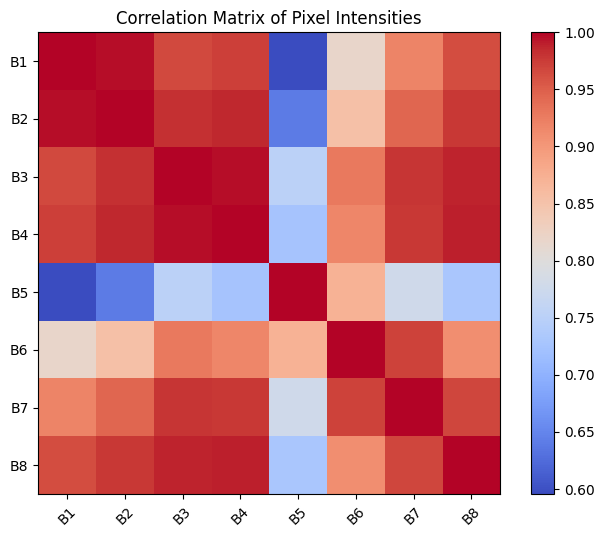

In [7]:
# Compute correlation matrix of pixel intensities across images (flattened)
flattened_images = [img.ravel() for img in images]
correlation_matrix = np.corrcoef(flattened_images)

# Display the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title("Correlation Matrix of Pixel Intensities")
plt.xticks(range(8), [f"B{i}" for i in range(1, 9)], rotation=45)
plt.yticks(range(8), [f"B{i}" for i in range(1, 9)])
plt.show()